  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom  
       InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY G

<ipython-input-3-0eef0b2132ad>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d-%m-%Y %H:%M')


   RFM_Segment      Recency  Frequency      Monetary
0          111  4561.287234        1.0    186.630000
1          112  4561.113402        2.0    441.928247
2          113  4560.490909        2.0    946.589091
3          114  4558.571429        2.0  26362.594286
4          121  4562.000000        3.0    223.410000
5          122  4560.365385        3.0    535.362115
6          123  4560.549708        4.0   1096.024737
7          124  4559.897727        4.0   2910.558864
8          131  4565.000000        6.5    253.920000
9          132  4558.500000        6.0    511.270000
10         133  4559.952381        7.0   1286.331270
11         134  4558.752759       11.0   9591.601744
12         211  4583.484694        1.0    185.002959
13         212  4584.542105        1.0    463.345158
14         213  4585.093333        2.0    939.653333
15         214  4583.500000        2.0   2649.445000
16         221  4585.250000        3.0    194.413750
17         222  4584.416667        3.0    541.

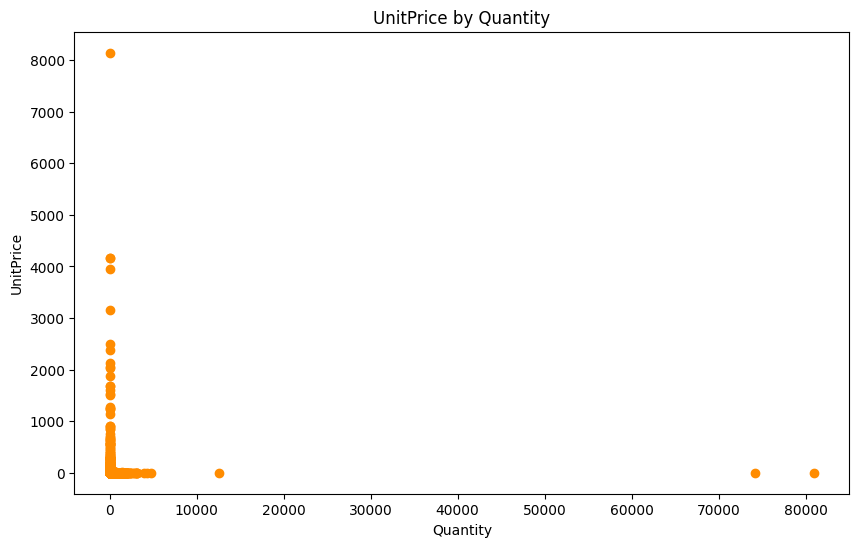

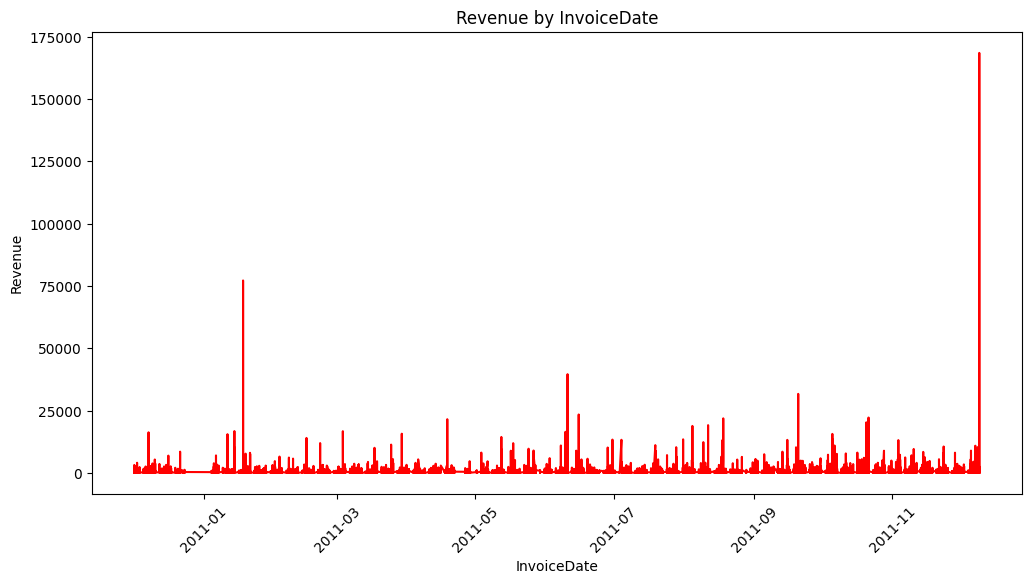

      CustomerID  TotalRevenue  AverageOrderValue  PurchaseFrequency  \
1690     14646.0     280206.02        3786.567838                 74   
4202     18102.0     259657.30        4327.621667                 60   
3729     17450.0     194550.79        4229.365000                 46   
3009     16446.0     168472.50       84236.250000                  2   
1880     14911.0     143825.06         715.547562                201   
55       12415.0     124914.53        5948.310952                 21   
1334     14156.0     117379.63        2134.175091                 55   
3772     17511.0      91062.38        2937.496129                 31   
2703     16029.0      81024.84        1286.108571                 63   
0        12346.0      77183.60       77183.600000                  1   

            CLV  
1690  840618.06  
4202  778971.90  
3729  583652.37  
3009  505417.50  
1880  431475.18  
55    374743.59  
1334  352138.89  
3772  273187.14  
2703  243074.52  
0     231550.80  


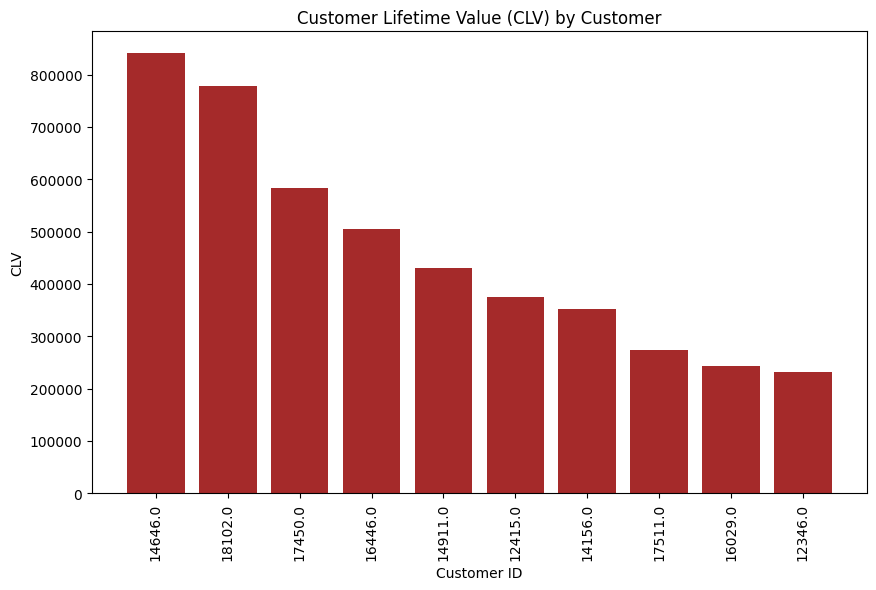

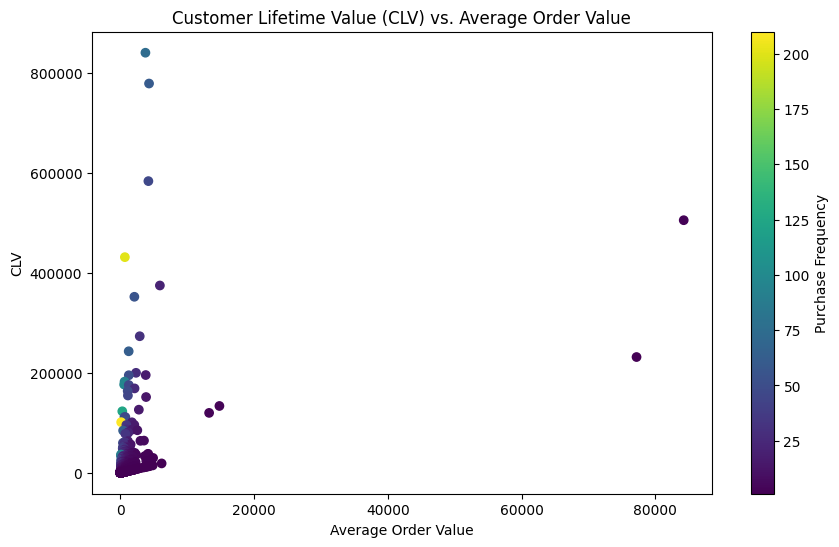

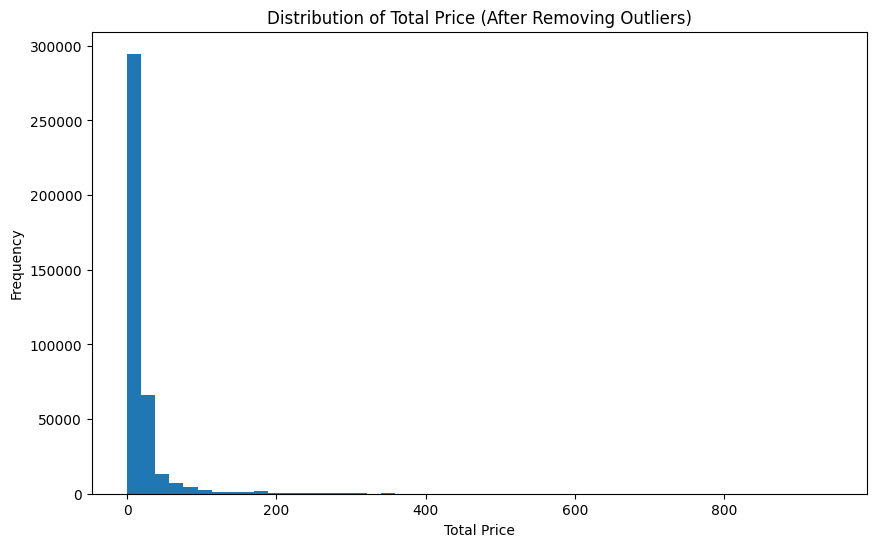

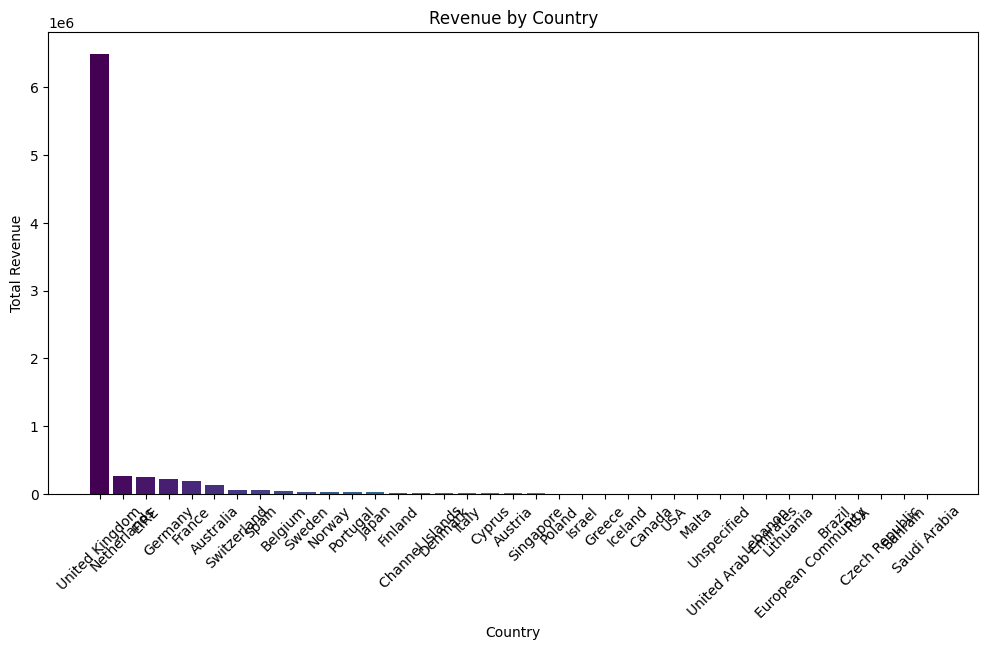

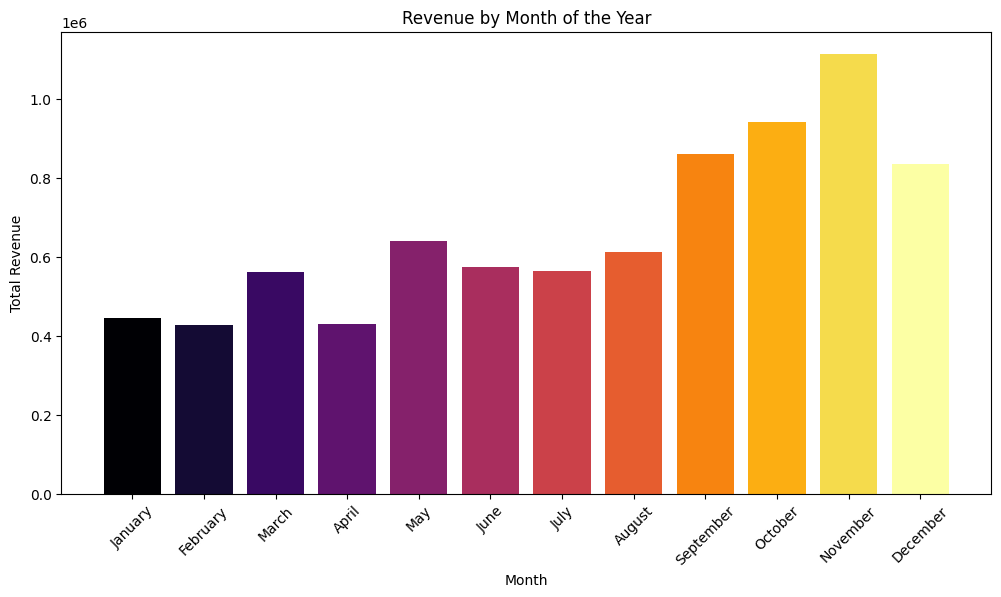

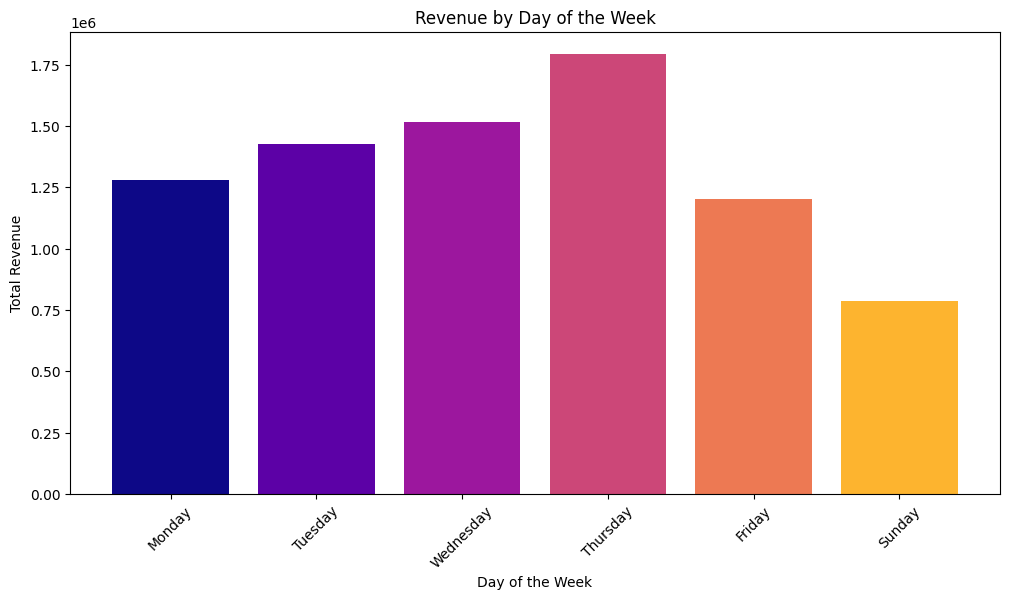

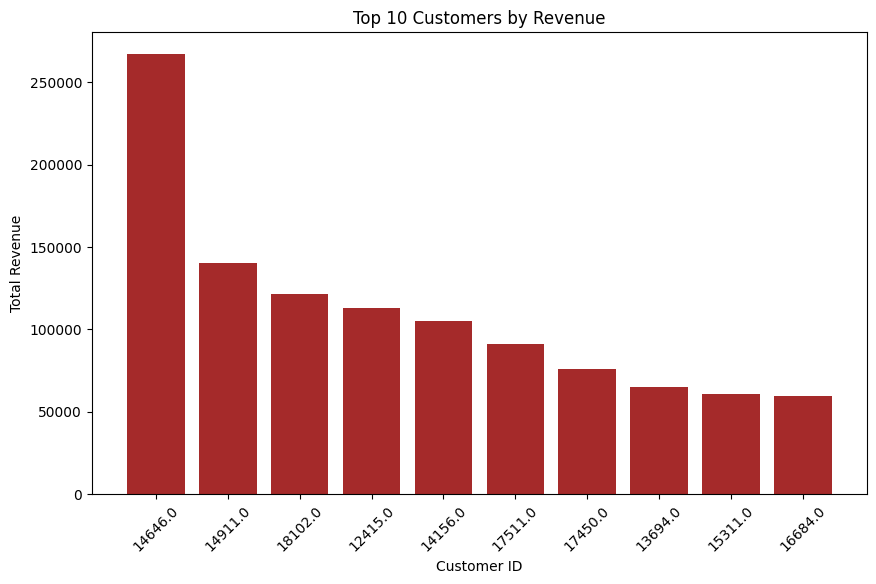

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


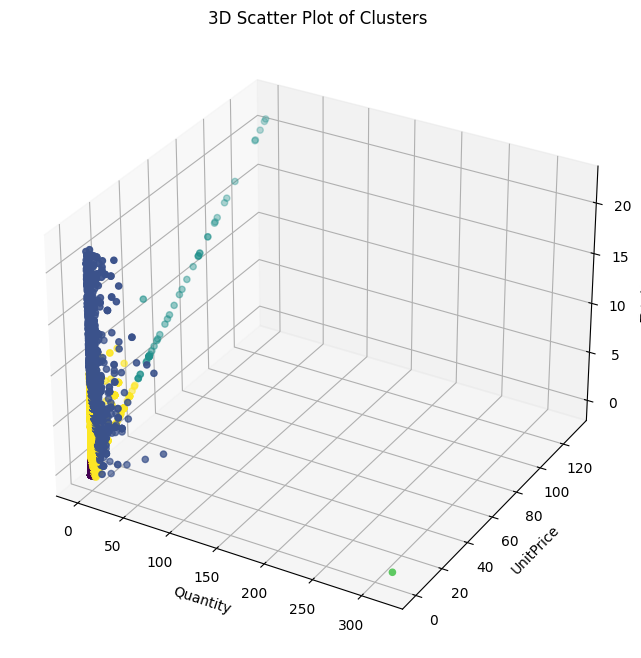

   Cluster      Quantity   UnitPrice  TotalPrice
0        0      8.186736    2.851517   13.742284
1        1    333.088812    2.478968  430.874896
2        2      1.020408  461.142449  466.766939
3        3  12540.000000    0.000000    0.000000
4        4     73.781583    4.968511  133.462942


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# Load the data from a CSV file
data = pd.read_csv("nd.csv", encoding="latin-1")
# data = pd.read_csv("nd.csv")

# Display the first few rows of the data
print(data.head())
print(data.tail())
print(data.info())

# Check for missing values
missing_values = data.isnull().sum().sum()
print(f'Total missing values: {missing_values}')

# Remove rows with missing values
data = data.dropna()

# Identify and treat canceled invoices
canceled_invoices = data.groupby('InvoiceNo')['Quantity'].apply(lambda x: (x < 0).any()).reset_index()
canceled_invoices.columns = ['InvoiceNo', 'is_canceled']
data = data[~data['InvoiceNo'].isin(canceled_invoices[canceled_invoices['is_canceled'] == True]['InvoiceNo'])]

# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d-%m-%Y %H:%M')

# Extract day, month, year, hour, and minute from InvoiceDate
data['Day'] = data['InvoiceDate'].dt.day
data['Month'] = data['InvoiceDate'].dt.month
data['Year'] = data['InvoiceDate'].dt.year
data['Hour'] = data['InvoiceDate'].dt.hour
data['Minute'] = data['InvoiceDate'].dt.minute

# Calculate total price and description length
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data['DescriptionLength'] = data['Description'].str.len()

# Calculate RFM metrics
rfm_data = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (datetime.now() - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()
rfm_data.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Calculate RFM scores
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 4, labels=False) + 1
# rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'], 4, labels=False) + 1
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'], 4, labels=False, duplicates="drop") + 1
rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'], 4, labels=False) + 1

# Combine RFM scores
rfm_data['RFM_Segment'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)
rfm_data['RFM_Score'] = rfm_data['R_Score'] + rfm_data['F_Score'] + rfm_data['M_Score']

# Segment summary
segment_summary = rfm_data.groupby('RFM_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'median',
    'Monetary': 'mean'
}).reset_index()

print(segment_summary)

# Define marketing strategies
def marketing_strategy(segment):
    if segment == "111":
        return "VIP customers - Provide personalized offers and exclusive perks"
    elif segment == "444":
        return "Low-value customers - Focus on retention and reactivation campaigns"
    elif segment in ["211", "212", "311", "312"]:
        return "Potential high-value customers - Offer incentives to increase frequency and monetary value"
    else:
        return "Other segments - Tailor marketing strategies based on segment characteristics"

rfm_data['Marketing_Strategy'] = rfm_data['RFM_Segment'].apply(marketing_strategy)
print(rfm_data[['RFM_Segment', 'Marketing_Strategy']])

# Visualizations

# Scatter plot for UnitPrice by Quantity
plt.figure(figsize=(10, 6))
plt.scatter(data['Quantity'], data['UnitPrice'], color='darkorange')
plt.title('UnitPrice by Quantity')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

# Line plot for Revenue by InvoiceDate
revenue_by_date = data.groupby('InvoiceDate')['TotalPrice'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(revenue_by_date['InvoiceDate'], revenue_by_date['TotalPrice'], color='red')
plt.title('Revenue by InvoiceDate')
plt.xlabel('InvoiceDate')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

# Calculate Total Revenue per Customer
customer_revenue = data.groupby('CustomerID')['TotalPrice'].sum().reset_index()
customer_revenue.columns = ['CustomerID', 'TotalRevenue']

# Calculate Average Order Value per Customer
average_order_value = data.groupby(['CustomerID', 'InvoiceNo'])['TotalPrice'].sum().groupby('CustomerID').mean().reset_index()
average_order_value.columns = ['CustomerID', 'AverageOrderValue']

# Calculate Purchase Frequency per Customer
purchase_frequency = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
purchase_frequency.columns = ['CustomerID', 'PurchaseFrequency']

# Calculate Customer Lifetime Value (CLV)
clv_data = customer_revenue.merge(average_order_value, on='CustomerID').merge(purchase_frequency, on='CustomerID')
average_customer_lifespan = 3  # Example value (in years)
clv_data['CLV'] = clv_data['AverageOrderValue'] * clv_data['PurchaseFrequency'] * average_customer_lifespan
clv_data = clv_data.sort_values(by='CLV', ascending=False)
print(clv_data.head(10))

# Bar plot of CLV by Customer
plt.figure(figsize=(10, 6))
top_10_customers = clv_data.head(10)
plt.bar(top_10_customers['CustomerID'].astype(str), top_10_customers['CLV'], color='brown')
plt.title('Customer Lifetime Value (CLV) by Customer')
plt.xlabel('Customer ID')
plt.ylabel('CLV')
plt.xticks(rotation=90)
plt.show()

# Scatter plot for CLV vs. Average Order Value
plt.figure(figsize=(10, 6))
plt.scatter(clv_data['AverageOrderValue'], clv_data['CLV'], c=clv_data['PurchaseFrequency'], cmap='viridis')
plt.colorbar(label='Purchase Frequency')
plt.title('Customer Lifetime Value (CLV) vs. Average Order Value')
plt.xlabel('Average Order Value')
plt.ylabel('CLV')
plt.show()

# Remove outliers based on Z-Score
data['ZScore'] = (data['TotalPrice'] - data['TotalPrice'].mean()) / data['TotalPrice'].std()
outlier_threshold = 3
data = data[np.abs(data['ZScore']) <= outlier_threshold]

# Visualize the distribution of TotalPrice after removing outliers
plt.figure(figsize=(10, 6))
plt.hist(data['TotalPrice'], bins=50)
plt.title('Distribution of Total Price (After Removing Outliers)')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

# Revenue by Country
revenue_by_country = data.groupby('Country')['TotalPrice'].sum().reset_index().sort_values(by='TotalPrice', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(revenue_by_country['Country'], revenue_by_country['TotalPrice'], color=plt.cm.viridis(np.linspace(0, 1, len(revenue_by_country))))
plt.title('Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Revenue by Month
revenue_by_month = data.groupby('Month')['TotalPrice'].sum().reset_index()
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
revenue_by_month['Month'] = pd.Categorical(revenue_by_month['Month'], categories=range(1, 13), ordered=True)
revenue_by_month = revenue_by_month.sort_values(by='Month')
plt.figure(figsize=(12, 6))
plt.bar(month_order, revenue_by_month['TotalPrice'], color=plt.cm.inferno(np.linspace(0, 1, 12)))
plt.title('Revenue by Month of the Year')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Revenue by Day of the Week
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()
revenue_by_day = data.groupby('DayOfWeek')['TotalPrice'].sum().reset_index()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
revenue_by_day['DayOfWeek'] = pd.Categorical(revenue_by_day['DayOfWeek'], categories=day_order, ordered=True)
revenue_by_day = revenue_by_day.sort_values(by='DayOfWeek')
plt.figure(figsize=(12, 6))
plt.bar(revenue_by_day['DayOfWeek'], revenue_by_day['TotalPrice'], color=plt.cm.plasma(np.linspace(0, 1, 7)))
plt.title('Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Top 10 Customers by Revenue
top_10_customers = data.groupby('CustomerID')['TotalPrice'].sum().reset_index().sort_values(by='TotalPrice', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_customers['CustomerID'].astype(str), top_10_customers['TotalPrice'], color='brown')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Extract features for clustering
features = data[['Quantity', 'UnitPrice', 'TotalPrice']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=123)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Plot clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_features[:, 0], scaled_features[:, 1], scaled_features[:, 2], c=data['Cluster'], cmap='viridis', marker='o')
ax.set_xlabel('Quantity')
ax.set_ylabel('UnitPrice')
ax.set_zlabel('TotalPrice')
plt.title('3D Scatter Plot of Clusters')
plt.show()

# Cluster means
cluster_means = data.groupby('Cluster')[['Quantity', 'UnitPrice', 'TotalPrice']].mean().reset_index()
print(cluster_means)
